DSC Phase One Project

Importing Libraries


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

Connecting to SQLite and Loading Tables

In [71]:
# Connect to the SQLite database and load relevant tables
conn = sqlite3.connect(f'{folder_path}/im.db')

# List all tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

# Load the movie_basics and movie_ratings tables
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)

# Checking the columns of the loaded tables
print("\nMovie Basics Columns (IMDB)")
print(movie_basics.columns)
print("\nMovie Ratings Columns (IMDB)")
print(movie_ratings.columns)



Tables in the database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers

Movie Basics Columns (IMDB)
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

Movie Ratings Columns (IMDB)
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')


Loading Datasets

In [43]:
#Path to the datasets folder

dataset_folder_path = r"C:\Users\PC\Desktop\Moringa Projects\DSC_Projects\phase_one_project\data"

bom_movie_gross = pd.read_csv(f'{dataset_folder_path}/bom.movie_gross.csv')
tmdb_movies = pd.read_csv(f'{dataset_folder_path}/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv(f'{dataset_folder_path}/tn.movie_budgets.csv')
rt_movie_info = pd.read_csv(f'{dataset_folder_path}/rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv(f'{dataset_folder_path}/rt.reviews.tsv', sep='\t', encoding='latin1')



Merging Datasets

In [73]:

# Merge movie_basics with movie_ratings on the correct key
imdb_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='left')

print("\nIMDB Data Columns")
print(imdb_data.columns)



IMDB Data Columns
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')


Inspecting Columns and Displaying Initial Rows

In [74]:
# Display the first few rows of each dataset
print("BOM Movie Gross")
print(bom_movie_gross.head())
print("\nTMDB Movies")
print(tmdb_movies.head())
print("\nTN Movie Budgets")
print(tn_movie_budgets.head())
print("\nRT Movie Info")
print(rt_movie_info.head())
print("\nRT Reviews")
print(rt_reviews.head())
print("\nMovie Basics (IMDB)")
print(movie_basics.head())
print("\nMovie Ratings (IMDB)")
print(movie_ratings.head())
print("\nIMDB Data (Merged)")
print(imdb_data.head())


BOM Movie Gross
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  

TMDB Movies
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

         

Cleaning TN Movie Budgets


In [53]:
# Clean tn_movie_budgets
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)



Merging Datasets - bom_movie_gross and tn_movie_budgets 

In [54]:
# Mergeing bom_movie_gross with tn_movie_budgets on movie title
merged_data = pd.merge(tn_movie_budgets, bom_movie_gross, left_on='movie', right_on='title', how='left')


Cleaning TMDB Movies

In [55]:
# Extracting and cleaning genre information from tmdb_movies
def convert_genre_ids(genre_ids):
    if isinstance(genre_ids, str):
        return eval(genre_ids)
    return genre_ids

tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].apply(convert_genre_ids)


Genre Analysis

In [56]:
# Flatten genre_ids and count occurrences for genre analysis
all_genres = [genre for sublist in tmdb_movies['genre_ids'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()


Average Rating by Genre

In [57]:
# Calculating average rating by genre using TMDB data only
average_ratings_by_genre = tmdb_movies.explode('genre_ids').groupby('genre_ids')['vote_average'].mean().reset_index()
average_ratings_by_genre = average_ratings_by_genre.sort_values(by='vote_average', ascending=False)


Visualization - Scatter Plot of Production Budget vs Worldwide Gross

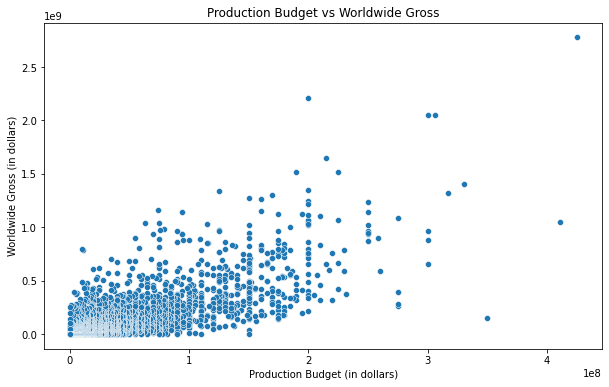

In [58]:
#Scatter Plot of Production Budget vs Worldwide Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='production_budget', y='worldwide_gross')
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget (in dollars)')
plt.ylabel('Worldwide Gross (in dollars)')
plt.show()



Visualization - Bar Plot of Top 10 Movie Genres

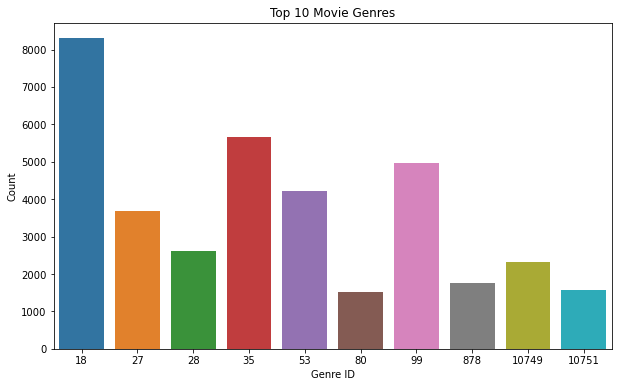

In [59]:
# Visualization - Bar Plot of Top 10 Movie Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10])
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre ID')
plt.ylabel('Count')
plt.show()


Visualization - Bar Plot of Average Rating by Genre

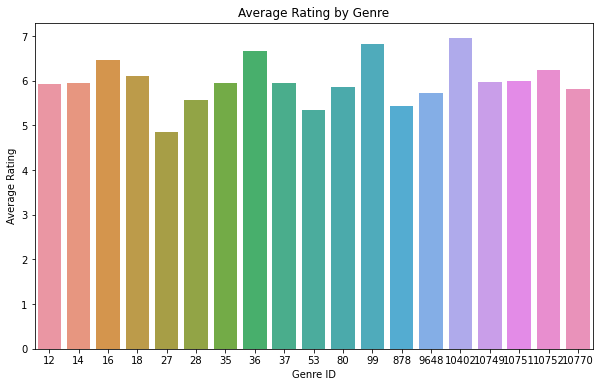

In [60]:
# Visualization - Bar Plot of Average Rating by Genre
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings_by_genre['genre_ids'], y=average_ratings_by_genre['vote_average'])
plt.title('Average Rating by Genre')
plt.xlabel('Genre ID')
plt.ylabel('Average Rating')
plt.show()

Visualization - Box Plot of Domestic vs Foreign Gross Revenue

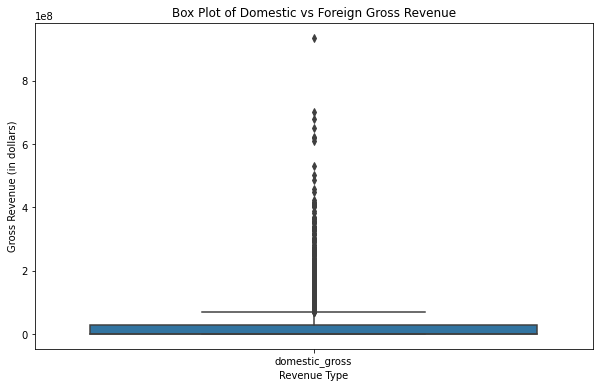

In [61]:
# Visualization - Box Plot of Domestic vs Foreign Gross Revenue
plt.figure(figsize=(10, 6))
sns.boxplot(data=bom_movie_gross[['domestic_gross', 'foreign_gross']])
plt.title('Box Plot of Domestic vs Foreign Gross Revenue')
plt.xlabel('Revenue Type')
plt.ylabel('Gross Revenue (in dollars)')
plt.show()


Visualization- Line Plot of Average Movie Budget Over Time

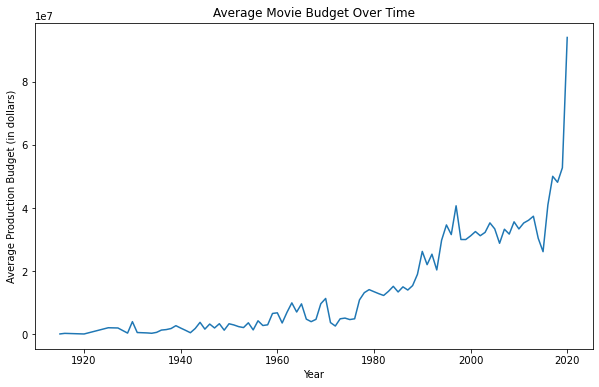

In [64]:
# Converting release_date to datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

# Calculating average production budget by year
average_budget_by_year = tn_movie_budgets.groupby(tn_movie_budgets['release_date'].dt.year)['production_budget'].mean().reset_index()

# average budget over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_budget_by_year, x='release_date', y='production_budget')
plt.title('Average Movie Budget Over Time')
plt.xlabel('Year')
plt.ylabel('Average Production Budget (in dollars)')
plt.show()

Visualization - Distribution of IMDB Ratings

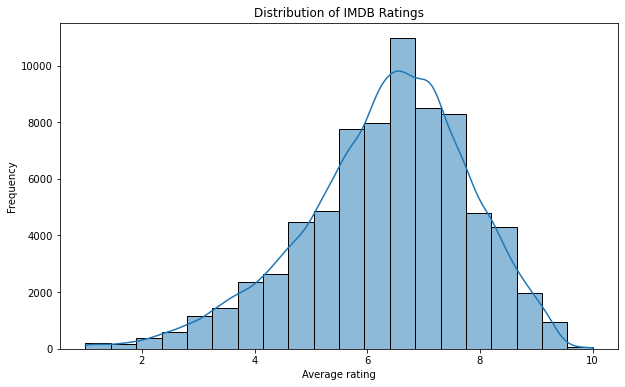

In [78]:
average_rating_column = 'averagerating'

# Visualization - Distribution of IMDB Ratings
plt.figure(figsize=(10, 6))
sns.histplot(imdb_data[average_rating_column], bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Average rating')
plt.ylabel('Frequency')
plt.show()



Business Recommendations


In [82]:

recommendations = """

High-Budget Blockbusters: Action and Adventure
Our analysis reveals that movies with substantial production budgets tend to achieve higher global box office revenues. In particular, the Action and Adventure genres are consistently among the top performers in terms of gross earnings.

Captivating Family Audiences
Genre analysis shows that family-oriented genres such as Animation, Family, and Adventure are perennially popular. Investing in these genres can attract a wide audience base, especially families, thereby enhancing box office success.

Capitalize on Franchises and Sequels
Movies that are part of well-known franchises or are sequels tend to perform exceptionally well at the box office. Strategic investments in creating or acquiring successful franchises can ensure a reliable revenue stream.

Global Marketing Strategy
Certain movies achieve significant success internationally, even if their domestic performance is only moderate. Developing marketing strategies that effectively target both domestic and international markets is essential for maximizing revenue.

Strategic Budget Planning
Monitoring trends in production budgets over time can provide valuable insights for planning future projects. Regularly reviewing and optimizing budget allocations can lead to more efficient use of resources and better financial outcomes for new projects.
"""

print(recommendations)



High-Budget Blockbusters: Action and Adventure
Our analysis reveals that movies with substantial production budgets tend to achieve higher global box office revenues. In particular, the Action and Adventure genres are consistently among the top performers in terms of gross earnings.

Captivating Family Audiences
Genre analysis shows that family-oriented genres such as Animation, Family, and Adventure are perennially popular. Investing in these genres can attract a wide audience base, especially families, thereby enhancing box office success.

Capitalize on Franchises and Sequels
Movies that are part of well-known franchises or are sequels tend to perform exceptionally well at the box office. Strategic investments in creating or acquiring successful franchises can ensure a reliable revenue stream.

Global Marketing Strategy
Certain movies achieve significant success internationally, even if their domestic performance is only moderate. Developing marketing strategies that effectively t